In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


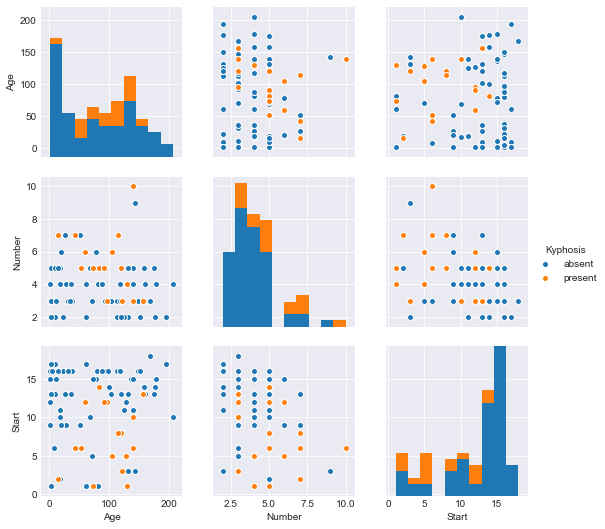

In [7]:
sns.pairplot(df, hue='Kyphosis')

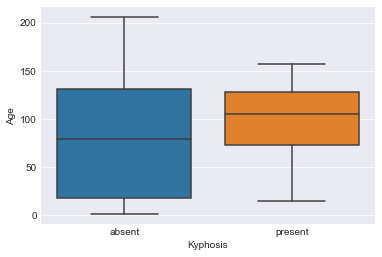

In [8]:
sns.boxplot(data=df, y='Age', x='Kyphosis')

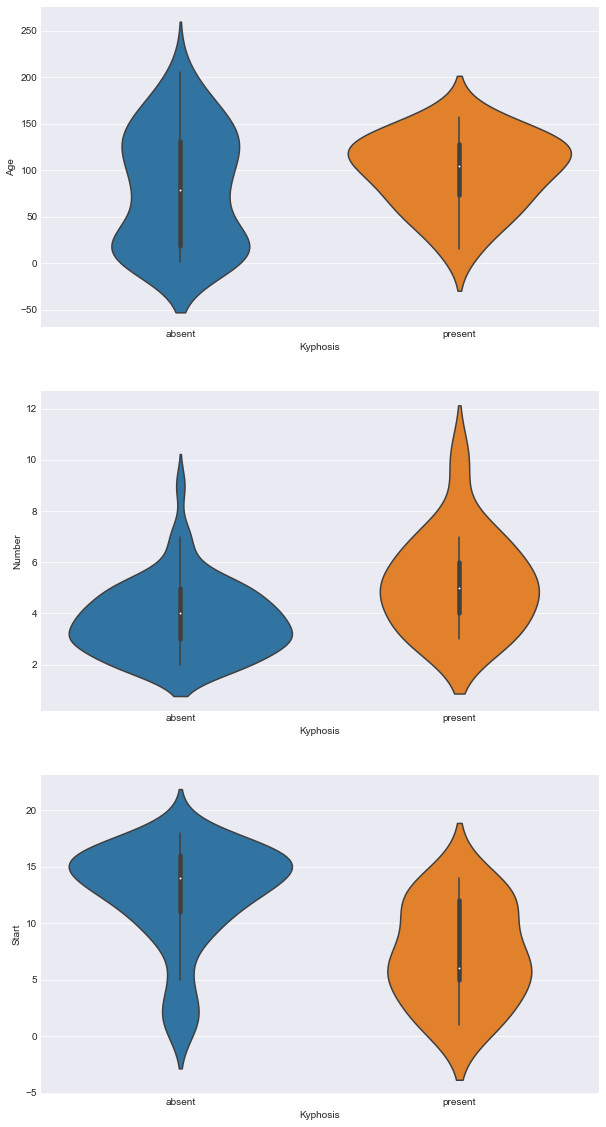

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10,20))

sns.violinplot(data=df, y='Age', x='Kyphosis', ax=ax1)
sns.violinplot(data=df, y='Number', x='Kyphosis', ax=ax2)
sns.violinplot(data=df, y='Start', x='Kyphosis', ax=ax3)


In [10]:
y = df['Kyphosis']
X = df.drop(['Kyphosis'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier()

In [60]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
y_pred = dt.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
def print_metrics(y_act, y_pred):
    print('Accuracy: ' + str(accuracy_score(y_act, y_pred)))
    print()
    print('Confusion matrix: \n' +  str(confusion_matrix(y_act,y_pred)))
    print()
    print('Class report: \n' +  str(classification_report(y_act,y_pred)))

In [64]:
print_metrics(y_test,y_pred)

Accuracy: 0.72

Confusion matrix: 
[[16  6]
 [ 1  2]]

Class report: 
             precision    recall  f1-score   support

     absent       0.94      0.73      0.82        22
    present       0.25      0.67      0.36         3

avg / total       0.86      0.72      0.77        25



In [65]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier(n_estimators=100)

In [75]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
y_pred = rf.predict(X_test)

In [77]:
print_metrics(y_test, y_pred)

Accuracy: 0.76

Confusion matrix: 
[[17  5]
 [ 1  2]]

Class report: 
             precision    recall  f1-score   support

     absent       0.94      0.77      0.85        22
    present       0.29      0.67      0.40         3

avg / total       0.87      0.76      0.80        25



In [95]:
accs = []
estimator_range = range(1,100)
best = 0
best_acc = 0

for i in estimator_range:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if (accuracy > best):
        best_acc = accuracy
        best = i
    accs.append(accuracy) 

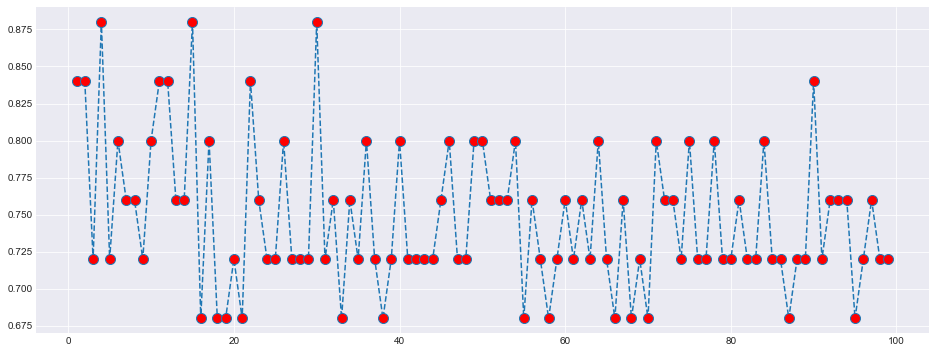

In [96]:
plt.figure(figsize=(16, 6))
plt.plot(estimator_range, accs, marker='o', markerfacecolor='red', linestyle='--', markersize=10)

In [98]:
print('Best n was {0} with accuracy {1}'.format(best, best_acc))

Best n was 1 with accuracy 0.84
